<a href="https://colab.research.google.com/github/luvr1/CCMACLRL_EXERCISES/blob/main/Reyes_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
df = pd.read_excel('./data.xlsx')
df.head()


,NAME,POSTS/ SHARE FREQUENTLY,ACTIVE,REPLIES TO COMMENTS/MESSAGES,NUMBER OF FRIENDS AND FOLLOWERS,PERSONALITY
0,Geanne,1,1,1,1500,1
1,Franchesca,0,1,1,628,0
2,Andre,0,0,1,271,0
3,Janelle,1,1,1,351,1
4,Kate,1,1,1,891,0


Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NAME                             100 non-null    object
 1   POSTS/ SHARE FREQUENTLY          100 non-null    int64 
 2   ACTIVE                           100 non-null    int64 
 3   REPLIES TO COMMENTS/MESSAGES     100 non-null    int64 
 4   NUMBER OF FRIENDS AND FOLLOWERS  100 non-null    int64 
 5   PERSONALITY                      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


,POSTS/ SHARE FREQUENTLY,ACTIVE,REPLIES TO COMMENTS/MESSAGES,NUMBER OF FRIENDS AND FOLLOWERS,PERSONALITY
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,0.57000,0.640000,0.440000,1309.320000,0.520000
std,0.49757,0.482418,0.498888,1424.954877,0.502117
min,0.00000,0.000000,0.000000,10.000000,0.000000
25%,0.00000,0.000000,0.000000,560.250000,0.000000
50%,1.00000,1.000000,0.000000,896.000000,1.000000
75%,1.00000,1.000000,1.000000,1500.000000,1.000000
max,1.00000,1.000000,1.000000,10000.000000,1.000000


Display the total number of samples from each label using `.value_counts()`

In [ ]:
df['PERSONALITY'].value_counts()

,count
PERSONALITY,
1,52
0,48


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

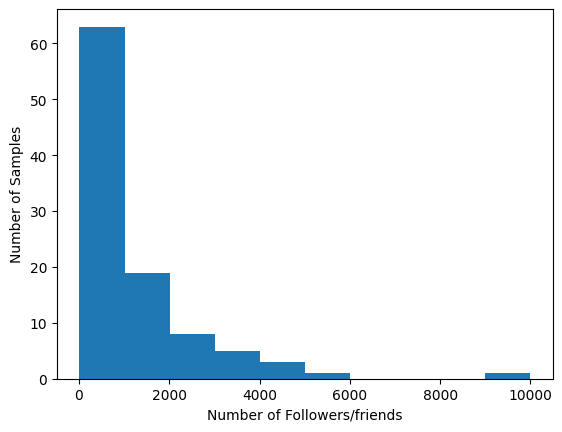

In [ ]:
plt.hist(df['NUMBER OF FRIENDS AND FOLLOWERS'])
plt.xlabel('Number of Followers/friends')
plt.ylabel('Number of Samples')
plt.show()

Remove the name column using `drop()` method

In [ ]:
df.drop(columns= 'NAME', inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
X = df.drop(columns='PERSONALITY').values
y = df['PERSONALITY'].values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df['PERSONALITY'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the dimensions of each variables using `.shape()`

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = (KNeighborsClassifier(n_neighbors=3))

Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

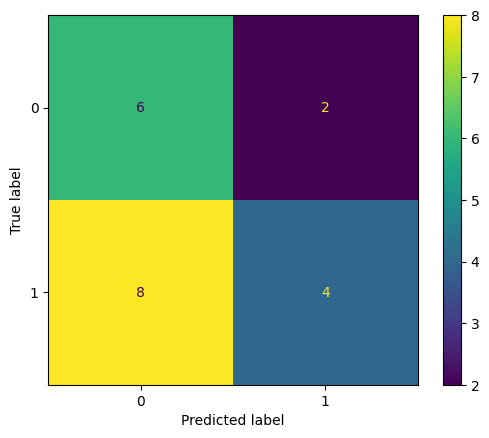

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.5

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.42857143 0.66666667]


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.75       0.33333333]


Display the f1-score

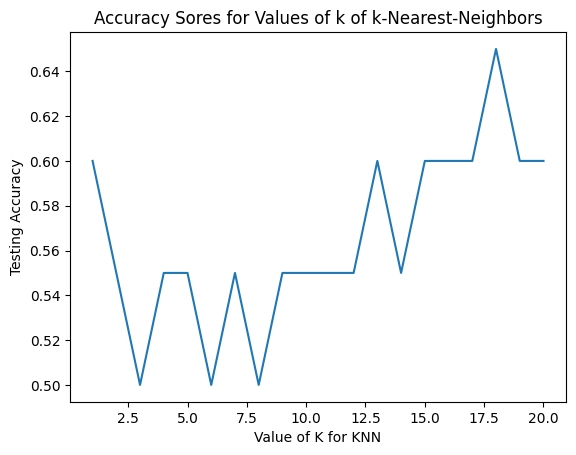

In [ ]:
k_range = list(range(1, 21))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy Sores for Values of k of k-Nearest-Neighbors')
plt.show()

## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
my_features = [[1, 0, 0, 357]]
my_prediction = knn.predict(my_features)

if my_prediction[0] == 0:
    print("Based on your features, your personality is likely: introvert")
else:
    print("Based on your features, your personality is likely: extrovert")

Based on your features, your personality is likely: introvert
